# Overview
* What is Cerbo?
* Using Cerbo for Diabetes Prediction
    * Data Visualization 
    * Modelling



## What is Cerbo?

I will be using the high-level machine learning API known as  [Cerbo](https://github.com/StartOnAI/Cerbo)! It can also be found [here](https://pypi.org/project/cerbo/). 

It is extremely easy to use and you can train state of the art(SOTA) ML Models in 4 lines of code(Continue looking at this notebook to see how)!

Cerbo wraps both Scikit-Learn, and Tensorflow(mainly with Keras) in an easy to use way and it provides a ton of useful functions such as,
  *     Creating your own data(Multidimensional data for regression and clustering)
  *     Loading in CSV Files(As seen in this dataset)
  *     Reading from Image Directory's for CNN's!
    
It also has many machine learning and deep learning algorithms such as:
  *      CNNs
  *      GANs
  *      Boosting(XGB, Gradient Boosting, and Ada Boost)
  *      KNN's
  *      And More!

Cerbo is also an open-source project so if you are interested in contributing just write a pull request and we will look over it!

# Code

Today, I will be demonstrating how to use Cerbo on the Diabetes Prediction Dataset!

## Imports

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
# To install Cerbo just do
!pip install cerbo

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
# To import the data you can simply do
import cerbo.preprocessing as cp
import cerbo.ML as cml

## Loading Data and Getting Insights

To load in the data you have to use a method in ```cerbo.preprocessing``` called ```load_custom_data```. The parameters you have to provide to ```load_custom_data```, are
   * Location of CSV File
   * The Column you have to predict
   * Num_Features(For scatter_matrix)
   * id(Put True if there is an ID column in the CSV file)

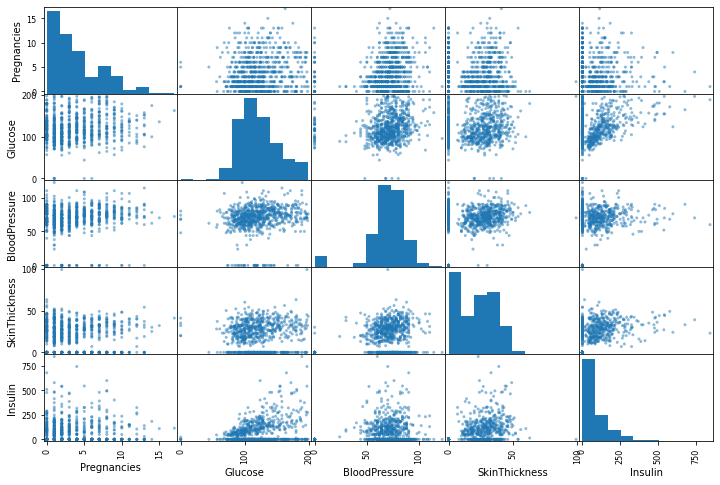

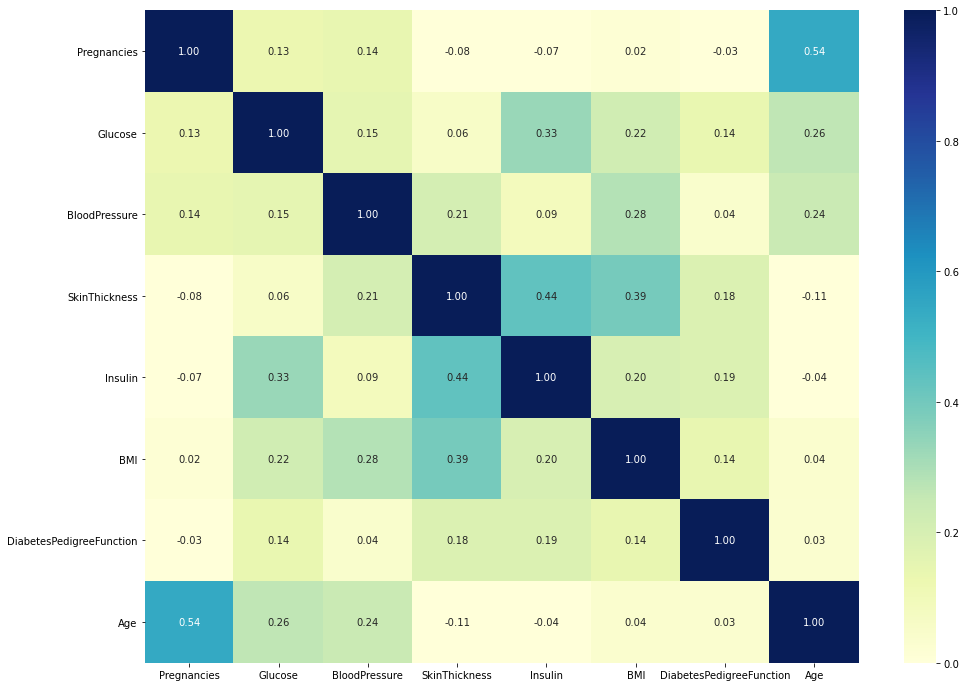

In [4]:
loc = "/kaggle/input/pima-indians-diabetes-database/diabetes.csv"

data, col_names = cp.load_custom_data(loc, "Outcome", num_features=5, id=False)

After running the ``load_custom_data`` method you can see that we first get a scatter_matrix showing the correlation of some set of features to another. You can change the value of ``num_features`` to display the scatter_matrix for more features!


Next, it outputs a correlation map showing the correlations between each of the input features. 


Note: Data is a dictionary containing 2 NumPy Arrays(One For the Inputs, and one for the outputs)

## Training Models


Now we are at the step where we can train models. For now, I will just show you how to write a KNN, Boosting(XGB), Decision Tree, and Logistic Regression. And it will only take 1 line to train all of these models and get **Training** and **Testing** accuracy

## KNN

Each model returns the actual model, along with a list of predictions

In [5]:
"""
Task = "C" stands for classification do "R" for Regression
data = data (The dictionary containing the data)
neighbors = 2 (# of neighbors for KNN)
"""

knn, preds = cml.KNN(task="c", data=data, neighbors=2) 

KNN Training Accuracy: 84.17132216014897%
KNN Testing Accuracy: 72.72727272727273%


To save the model do

```save_model("model_name")```

In [6]:
cml.save_model(knn)

Saved to disk!


## Boosting(XGB)

In [7]:
xgb, xgb_preds = cml.Boosting(task="c", data=data, algo="xgb")

Boosting Training Accuracy: 99.81378026070763%
Boosting Testing Accuracy: 74.89177489177489%


In [8]:
cml.save_model(xgb)

Saved to disk!


## Logistic Regression

In [9]:
lr, lr_preds = cml.LogisticReg(data)

Logistic Regression Training Accuracy: 78.2122905027933%
Logistic Regression Testing Accuracy: 74.02597402597402%


In [10]:
cml.save_model(lr)

Saved to disk!


## Random Forests

In [11]:
rf, rf_preds = cml.RandomForest(task="c", data=data)

Random Forest Training Accuracy: 100.0%
Random Forest Testing Accuracy: 75.32467532467533%


In [12]:
cml.save_model(rf)

Saved to disk!


# What we learned?

We covered a lot about this new ML API called Cerbo. We showed how you can train models in quite literally 4 lines(2 import statements, 2 lines of code!). With all of this information you can use this library to make ML extremely streamlined and make it have a much lower barrier of entry!